# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah data mahasiswa , yang di buat sendiri. Dataset ini terdiri dari 600 baris dan 17 kolom, mencakup kombinasi fitur numerik dan kategorikal. Tujuan dari proyek ini adalah untuk memprediksi Customer Status berdasarkan fitur-fitur yang tersedia.





# **2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE


Mounted at /content/drive


Pada tahap ini, mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **3. Memuat Dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/dataset_prediksi_DO_mahasiswa.csv', delimiter=';')
data

,id_mahasiswa,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,kehadiran_rata2,matkul_diulang,prodi,jenis_kelamin,aktivitas_lms,status_pekerjaan,beban_kerja,pendapatan_ortu,pendidikan_ortu,lokasi_tinggal,keterlibatan_organisasi,status_DO
0,M001,"3,25","2,93","3,32","3,76",80,0,Ilmu Komunikasi,Laki-laki,sangat_aktif,tidak_bekerja,0,"4,12",S1,kota,aktif,Tidak
1,M002,"2,88","2,88","3,79","3,38",77,3,Teknik Elektro,Perempuan,sangat_aktif,tidak_bekerja,0,"4,26",SMA,kota,aktif,Tidak
2,M003,"2,77","3,27","2,77","2,77",85,4,Hukum,Laki-laki,aktif,tidak_bekerja,0,"4,89",S1,kota,tidak aktif,Tidak
3,M004,"3,12","2,04","2,14","2,72",84,3,Teknik Elektro,Perempuan,aktif,tidak_bekerja,0,"14,4",SMA,kota,tidak aktif,Ya
4,M005,"2,49","3,16","2,55","2,29",64,0,Sistem Informasi,Laki-laki,aktif,tidak_bekerja,0,"4,7",SD,desa,aktif,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,M195,"3,44","2,36","3,4","3,42",93,3,Hukum,Laki-laki,kurang_aktif,tidak_bekerja,20,"2,58",SMP,kota,aktif,Ya
596,M196,"3,63","3,25","2,78","2,53",84,5,Sistem Informasi,Laki-laki,sangat_aktif,penuh_waktu,10,"18,87",SMA,kota,tidak aktif,Ya
597,M197,"2,14","2,57","2,98","2,4",66,3,Teknik Elektro,Laki-laki,kurang_aktif,paruh_waktu,20,"9,63",S2,desa,tidak aktif,Tidak
598,M198,"3,68","3,27","3,1","2,19",66,5,Hukum,Perempuan,kurang_aktif,tidak_bekerja,10,"1,93",SMP,desa,aktif,Tidak


Pada tahap ini, memuat dataset ke dalam notebook. Saya menggunakan pustaka pandas untuk membacanya karrena dataset saya dalam format CSV . Disini juga saya mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

karena data saya di Google Drive, jadi saya sebelumnya sudah menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

# **4. Exploratory Data Analysis (EDA)**



In [3]:
data.status_DO.value_counts()

,count
status_DO,
Tidak,438
Ya,162


In [4]:
# Menampilkan ringkasan informasi dataset
print("Ringkasan Dataset:")
data.info()

Ringkasan Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_mahasiswa             600 non-null    object
 1   ipk_sem1                 600 non-null    object
 2   ipk_sem2                 600 non-null    object
 3   ipk_sem3                 600 non-null    object
 4   ipk_sem4                 600 non-null    object
 5   kehadiran_rata2          600 non-null    int64 
 6   matkul_diulang           600 non-null    int64 
 7   prodi                    600 non-null    object
 8   jenis_kelamin            600 non-null    object
 9   aktivitas_lms            600 non-null    object
 10  status_pekerjaan         600 non-null    object
 11  beban_kerja              600 non-null    int64 
 12  pendapatan_ortu          600 non-null    object
 13  pendidikan_ortu          600 non-null    object
 14  lokasi_tinggal         

In [5]:
# Konversi kolom IPK dan pendapatan ke float
kolom_numerik = ['ipk_sem1', 'ipk_sem2', 'ipk_sem3', 'ipk_sem4', 'pendapatan_ortu',]

for kolom in kolom_numerik:
    data[kolom] = pd.to_numeric(data[kolom].astype(str).str.replace(',', '.').str.strip(), errors='coerce')


In [6]:
# Menampilkan ringkasan informasi dataset
print("Ringkasan Dataset:")
data.info()

Ringkasan Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_mahasiswa             600 non-null    object 
 1   ipk_sem1                 600 non-null    float64
 2   ipk_sem2                 600 non-null    float64
 3   ipk_sem3                 600 non-null    float64
 4   ipk_sem4                 600 non-null    float64
 5   kehadiran_rata2          600 non-null    int64  
 6   matkul_diulang           600 non-null    int64  
 7   prodi                    600 non-null    object 
 8   jenis_kelamin            600 non-null    object 
 9   aktivitas_lms            600 non-null    object 
 10  status_pekerjaan         600 non-null    object 
 11  beban_kerja              600 non-null    int64  
 12  pendapatan_ortu          600 non-null    float64
 13  pendidikan_ortu          600 non-null    object 
 14  lokasi_

In [7]:

# Identifikasi data yang hilang
missing_data = data.isnull().sum()

# Tampilkan jumlah data yang hilang di setiap kolom
print("Jumlah Data yang Hilang di Setiap Kolom:")
print(missing_data)

Jumlah Data yang Hilang di Setiap Kolom:
id_mahasiswa               0
ipk_sem1                   0
ipk_sem2                   0
ipk_sem3                   0
ipk_sem4                   0
kehadiran_rata2            0
matkul_diulang             0
prodi                      0
jenis_kelamin              0
aktivitas_lms              0
status_pekerjaan           0
beban_kerja                0
pendapatan_ortu            0
pendidikan_ortu            0
lokasi_tinggal             0
keterlibatan_organisasi    0
status_DO                  0
dtype: int64


In [8]:
# Drop kolom yang bisa menyebabkan data leakage
data = data.drop(columns=[ 'id_mahasiswa',])

In [9]:
print("Jumlah duplikasi: ", data.duplicated().sum())#Type your code here

Jumlah duplikasi:  0


In [10]:
data.describe()

,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,kehadiran_rata2,matkul_diulang,beban_kerja,pendapatan_ortu
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,2.998617,3.020817,3.005433,3.033433,71.070000,2.176667,12.211667,8.55630
std,0.479267,0.501572,0.512681,0.509151,16.375246,1.460254,13.391879,4.39539
min,1.670000,1.550000,1.380000,1.530000,40.000000,0.000000,0.000000,1.07000
25%,2.670000,2.660000,2.670000,2.670000,58.000000,1.000000,0.000000,4.70000
50%,3.005000,3.035000,3.010000,3.030000,72.000000,2.000000,10.000000,8.41000
75%,3.320000,3.362500,3.350000,3.392500,85.000000,3.000000,22.250000,12.22000
max,4.000000,4.000000,4.000000,4.000000,100.000000,5.000000,40.000000,19.98000


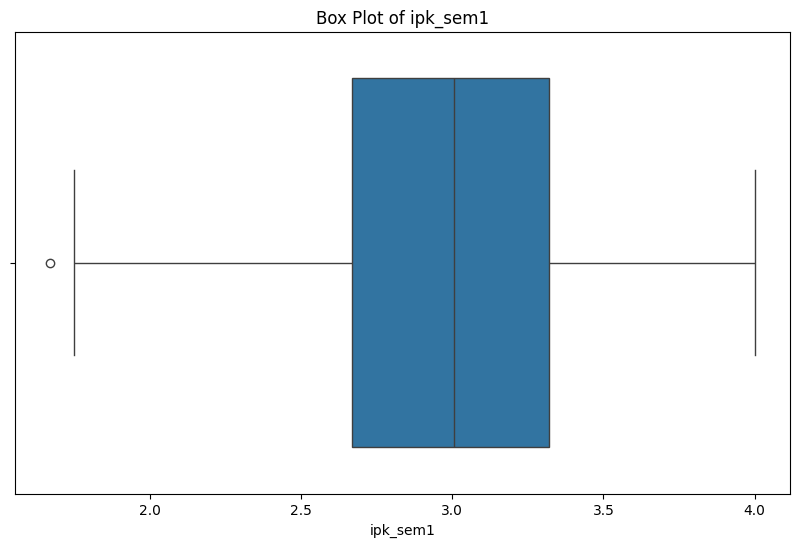

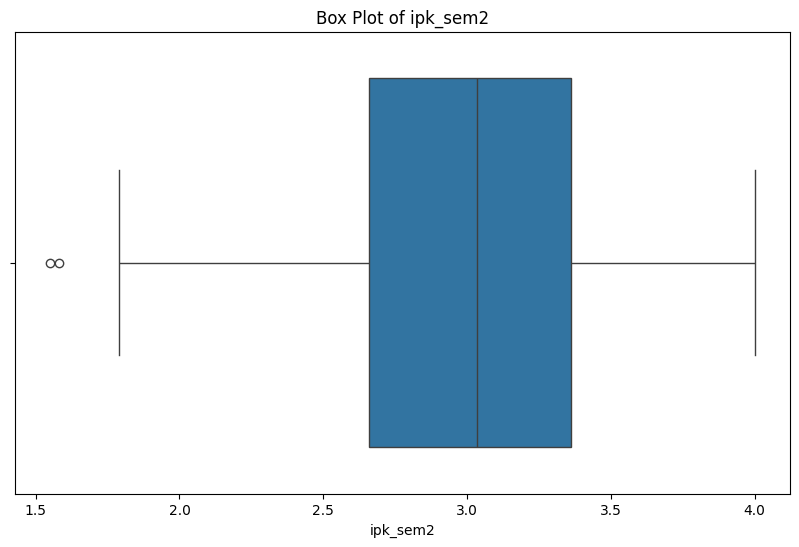

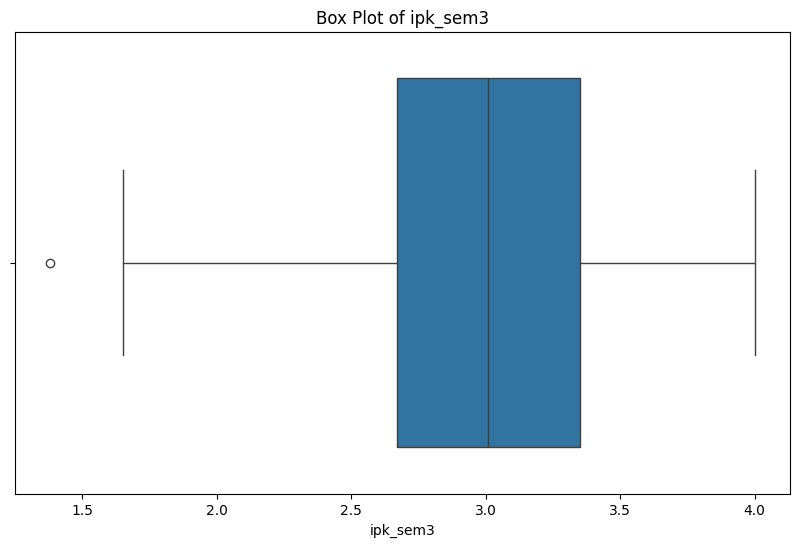

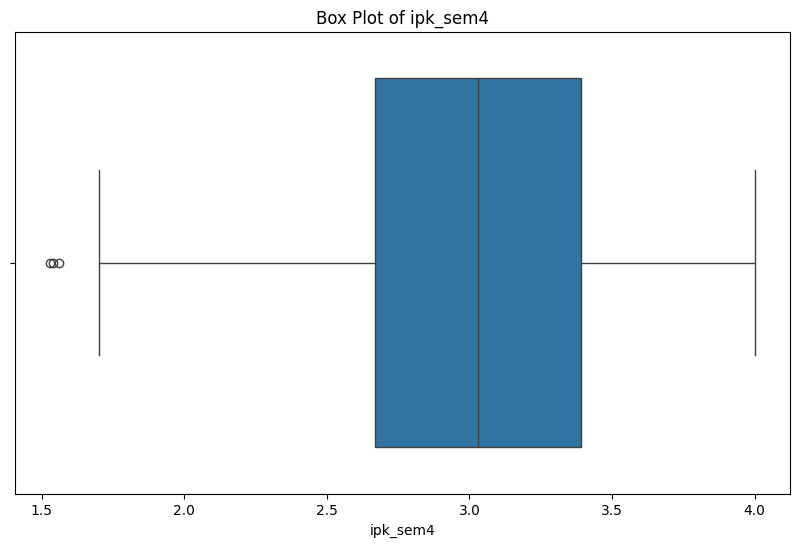

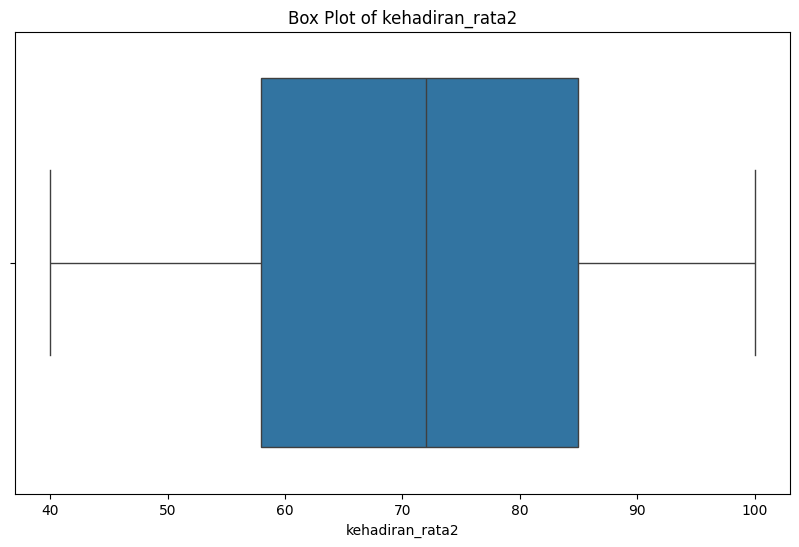

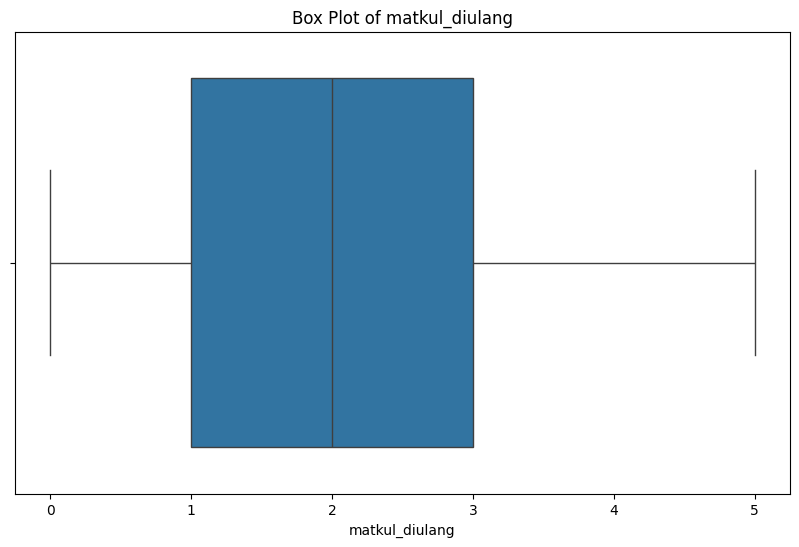

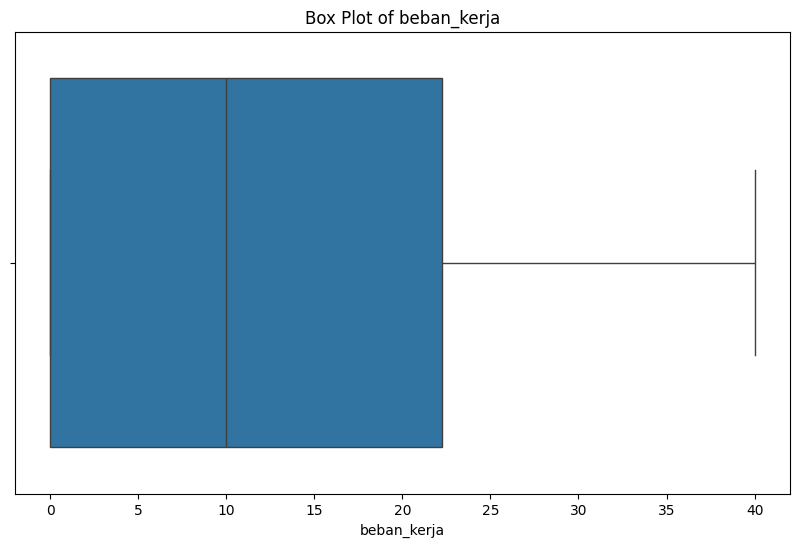

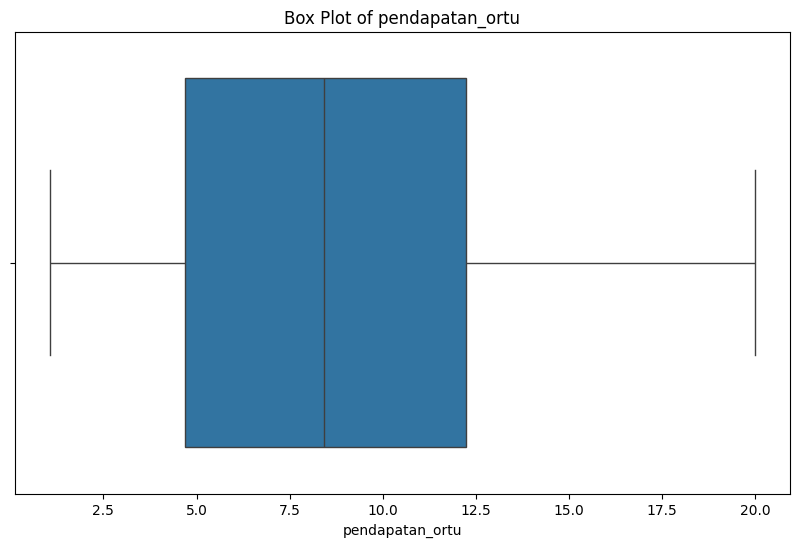

In [11]:
# Pilih semua kolom numerik
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [12]:
# Hanya menangani outlier pada kolom tertentu
outlier_cols = ['ipk_sem1', 'ipk_sem2', 'ipk_sem3', 'ipk_sem4']

for feature in outlier_cols:
    if feature in data.columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorizing (Mengganti outlier dengan batas bawah/atas)
        data[feature] = np.where(data[feature] < lower_bound, lower_bound, data[feature])
        data[feature] = np.where(data[feature] > upper_bound, upper_bound, data[feature])


data.shape


(600, 16)

In [13]:
# Cek hasil setelah penanganan outlier
print("Data setelah menghilangkan outlier pada TransactionAmount dan LoginAttempts:")
data.describe()


Data setelah menghilangkan outlier pada TransactionAmount dan LoginAttempts:


,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,kehadiran_rata2,matkul_diulang,beban_kerja,pendapatan_ortu
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000
mean,2.998658,3.020954,3.005883,3.033648,71.070000,2.176667,12.211667,8.55630
std,0.479152,0.501177,0.511369,0.508530,16.375246,1.460254,13.391879,4.39539
min,1.695000,1.606250,1.650000,1.586250,40.000000,0.000000,0.000000,1.07000
25%,2.670000,2.660000,2.670000,2.670000,58.000000,1.000000,0.000000,4.70000
50%,3.005000,3.035000,3.010000,3.030000,72.000000,2.000000,10.000000,8.41000
75%,3.320000,3.362500,3.350000,3.392500,85.000000,3.000000,22.250000,12.22000
max,4.000000,4.000000,4.000000,4.000000,100.000000,5.000000,40.000000,19.98000


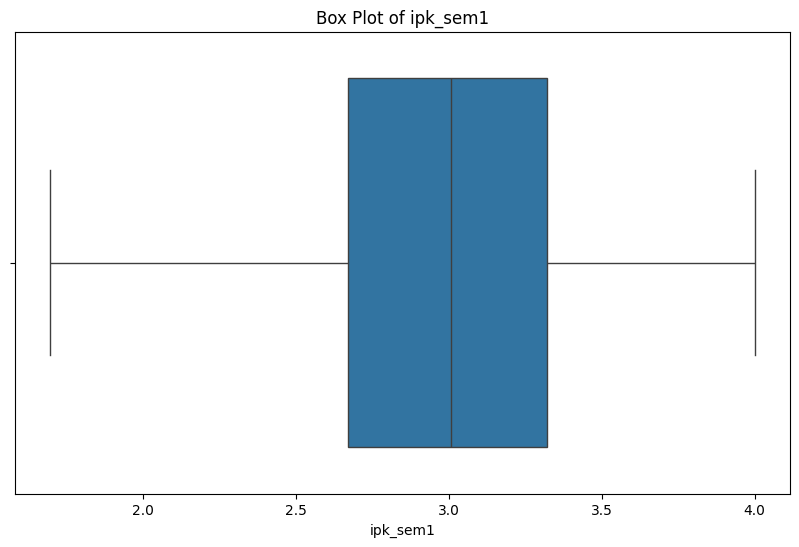

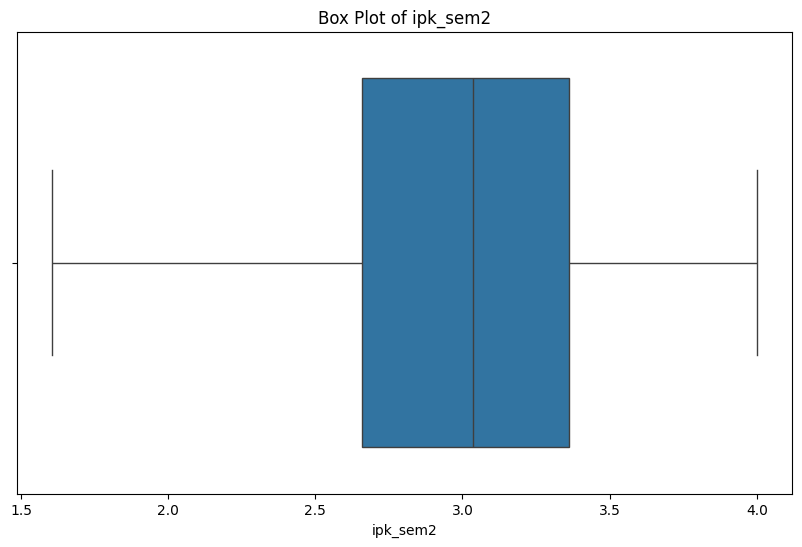

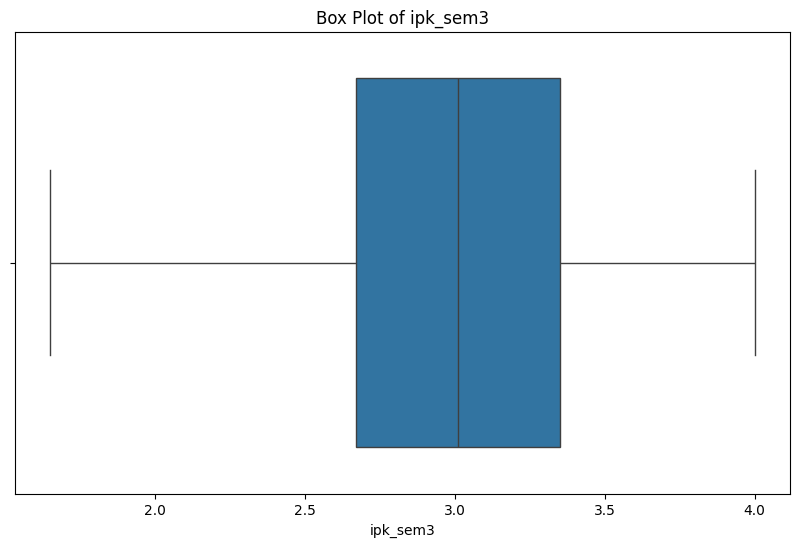

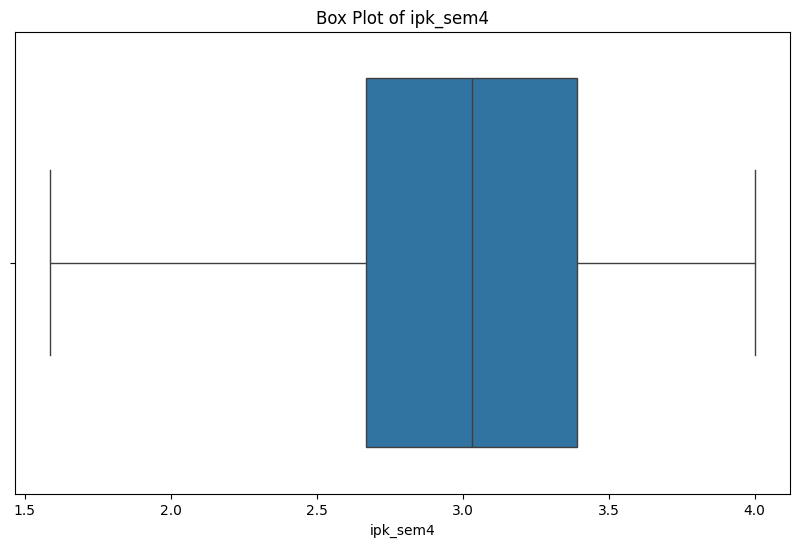

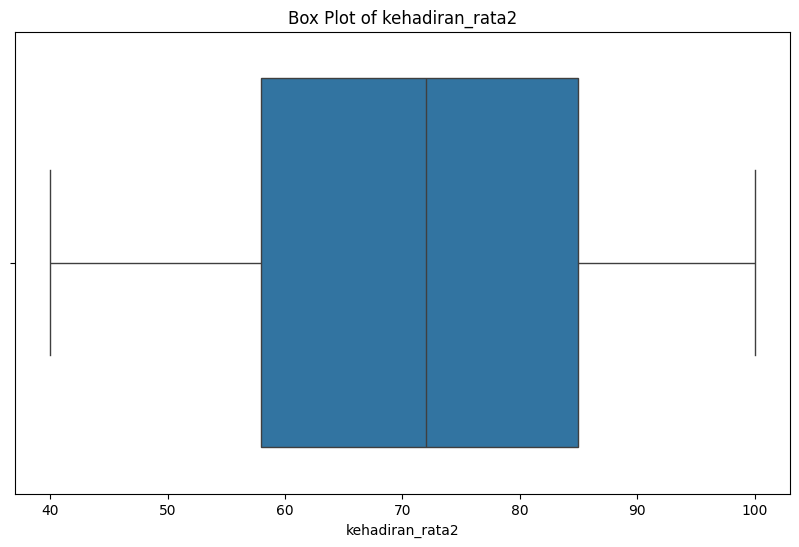

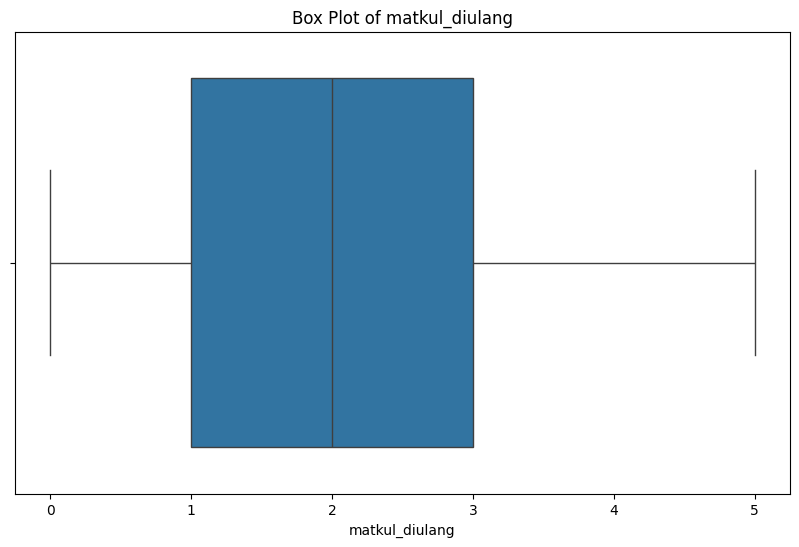

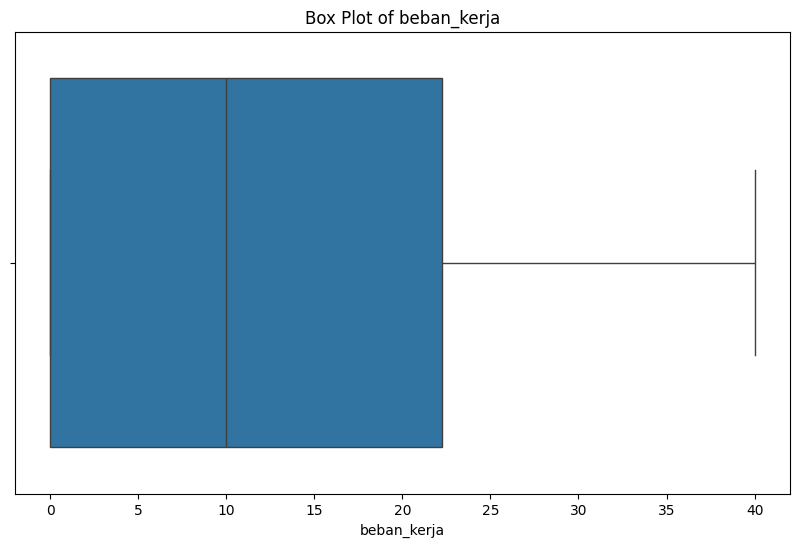

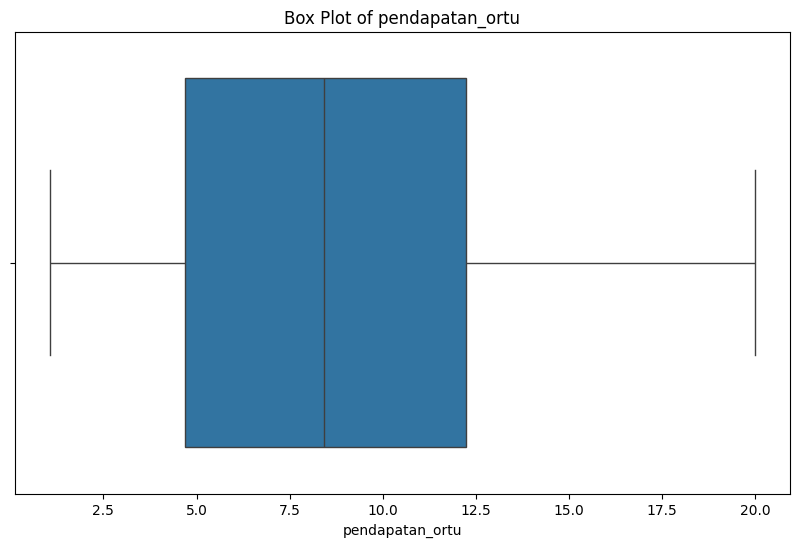

In [14]:
# Pilih semua kolom numerik
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [15]:
# Menentukan kolom numerik dan kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns


=== Analisis Fitur: prodi ===
                       jumlah sampel  persentase
prodi                                           
Hukum                             81        13.5
Sistem Informasi                  76        12.7
Ilmu Komunikasi                   72        12.0
Teknik Elektro                    69        11.5
Teknik Sipil                      56         9.3
Manajemen                         52         8.7
Akuntansi                         51         8.5
Kedokteran                        49         8.2
Pendidikan Matematika             48         8.0
Teknik Informatika                46         7.7


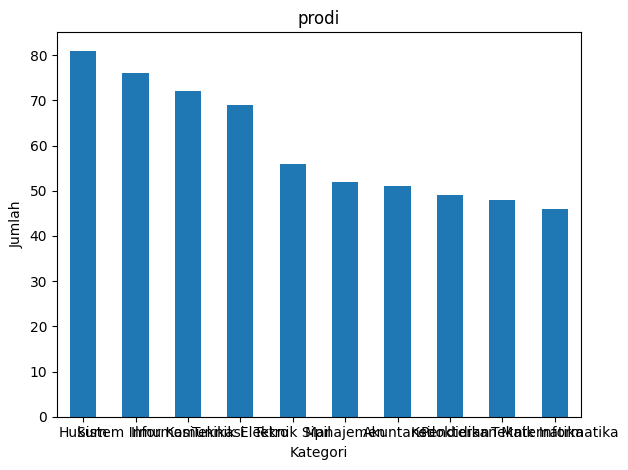


=== Analisis Fitur: jenis_kelamin ===
               jumlah sampel  persentase
jenis_kelamin                           
Perempuan                317        52.8
Laki-laki                283        47.2


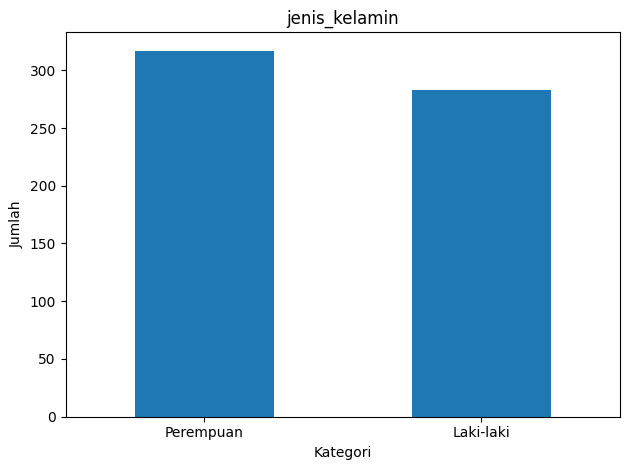


=== Analisis Fitur: aktivitas_lms ===
               jumlah sampel  persentase
aktivitas_lms                           
aktif                    245        40.8
sedang                   144        24.0
sangat_aktif             120        20.0
pasif                     54         9.0
kurang_aktif              37         6.2


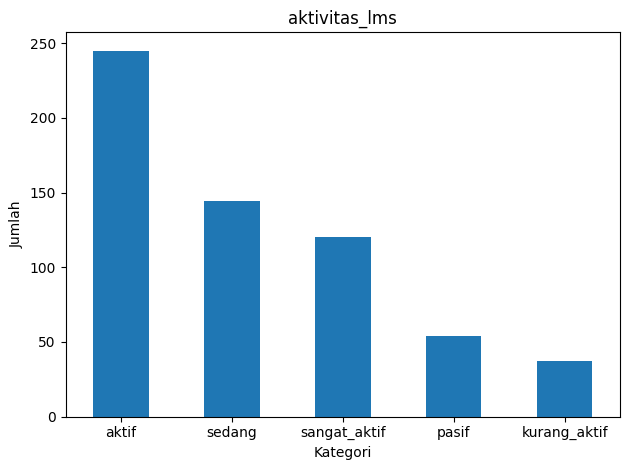


=== Analisis Fitur: status_pekerjaan ===
                  jumlah sampel  persentase
status_pekerjaan                           
tidak_bekerja               296        49.3
paruh_waktu                 190        31.7
penuh_waktu                 114        19.0


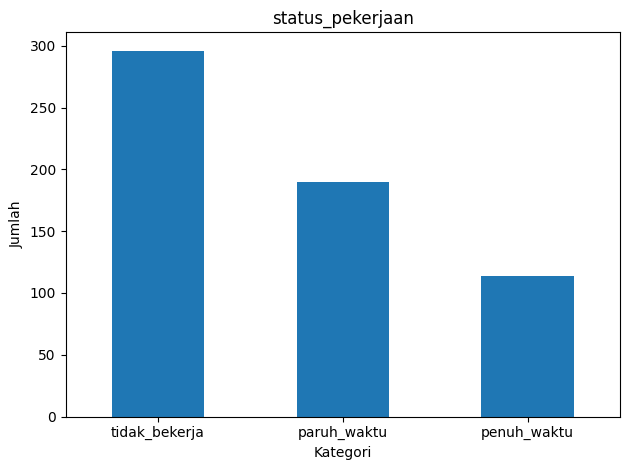


=== Analisis Fitur: pendidikan_ortu ===
                 jumlah sampel  persentase
pendidikan_ortu                           
SMA                        231        38.5
SMP                        112        18.7
S1                         109        18.2
S2                          67        11.2
SD                          66        11.0
D3                          15         2.5


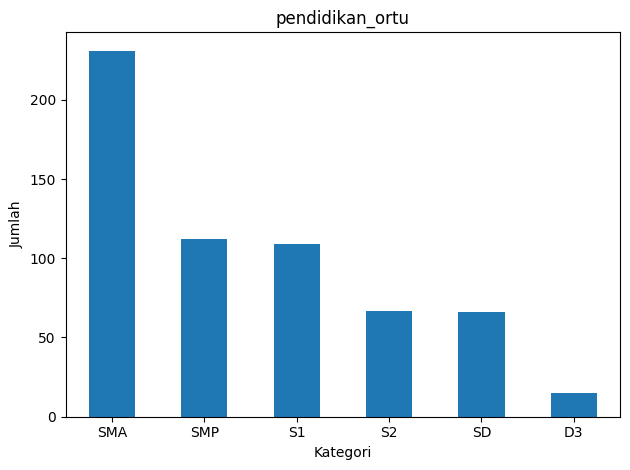


=== Analisis Fitur: lokasi_tinggal ===
                jumlah sampel  persentase
lokasi_tinggal                           
kota                      302        50.3
desa                      298        49.7


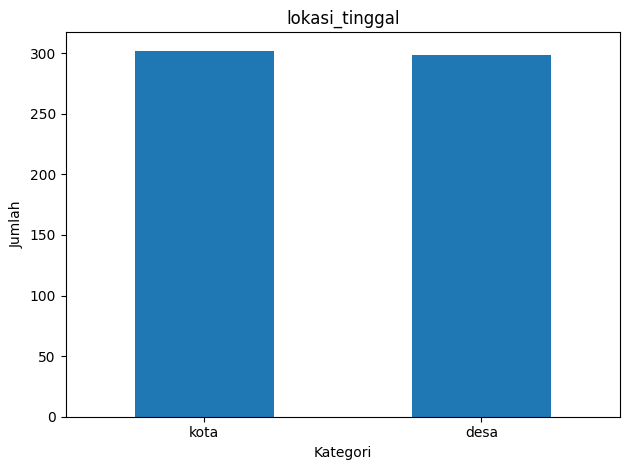


=== Analisis Fitur: keterlibatan_organisasi ===
                         jumlah sampel  persentase
keterlibatan_organisasi                           
tidak aktif                        304        50.7
aktif                              296        49.3


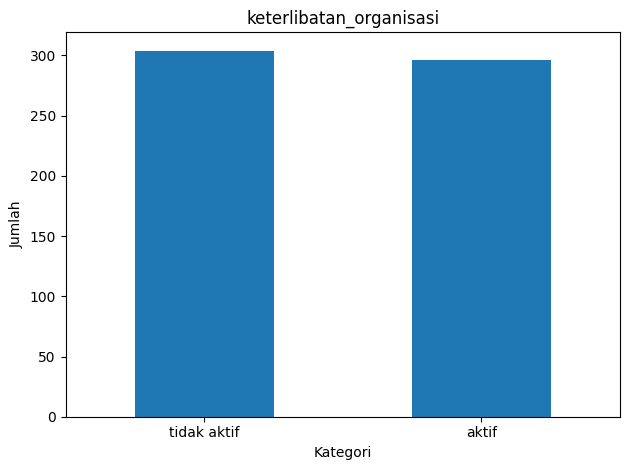


=== Analisis Fitur: status_DO ===
           jumlah sampel  persentase
status_DO                           
Tidak                438        73.0
Ya                   162        27.0


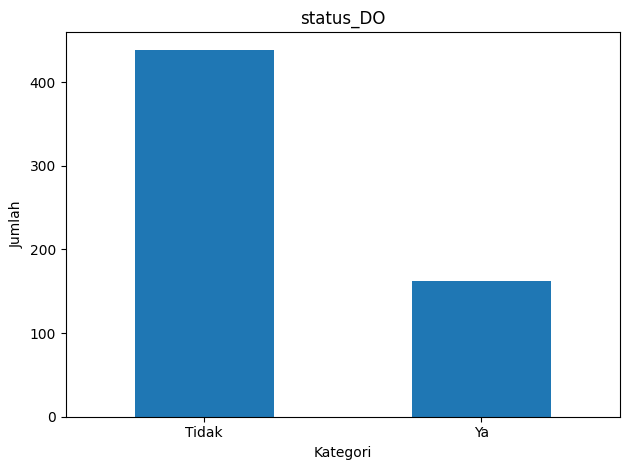

In [16]:
# Loop untuk setiap kolom kategorikal
for feature in categorical_cols:
    print(f"\n=== Analisis Fitur: {feature} ===")

    # Hitung jumlah dan persentase
    count = data[feature].value_counts()
    percent = 100 * data[feature].value_counts(normalize=True)

    # Buat DataFrame ringkasan
    df = pd.DataFrame({
        'jumlah sampel': count,
        'persentase': percent.round(1)
    })

    # Tampilkan DataFrame
    print(df)

    # Tampilkan plot batang
    count.plot(kind='bar', title=feature)
    plt.ylabel("Jumlah")
    plt.xlabel("Kategori")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

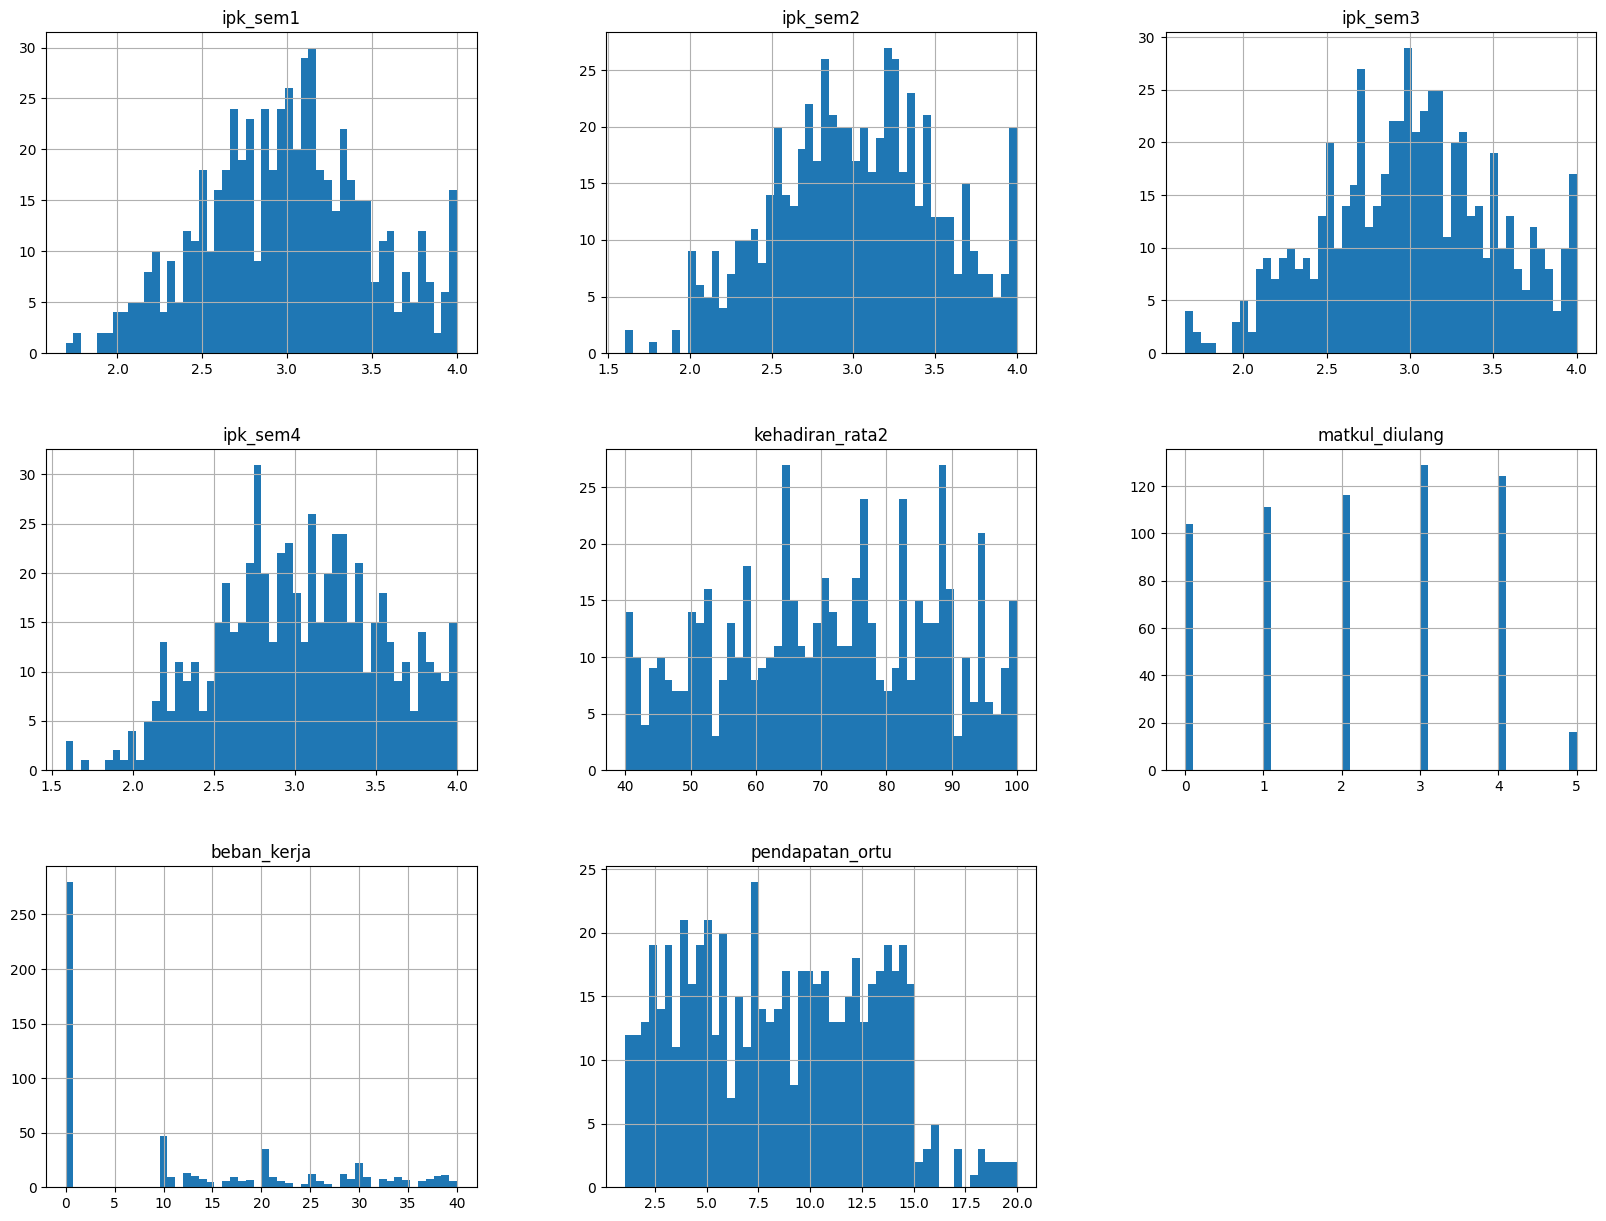

In [17]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


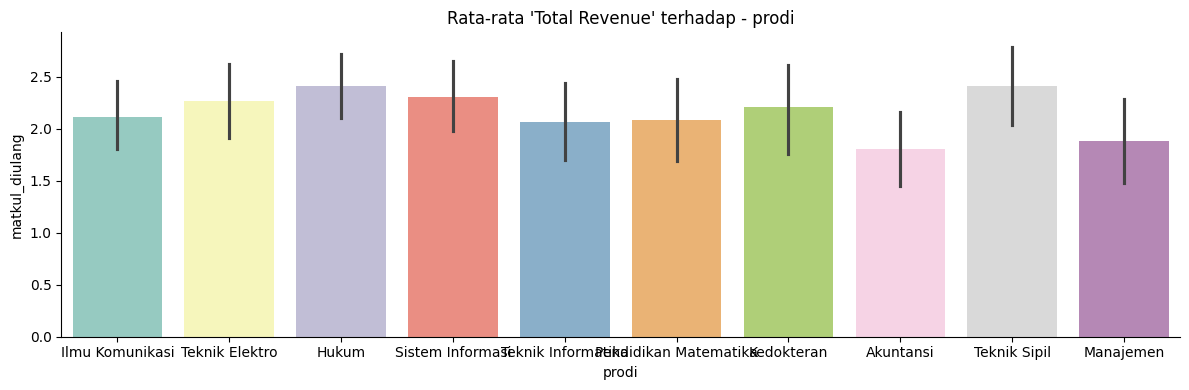

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


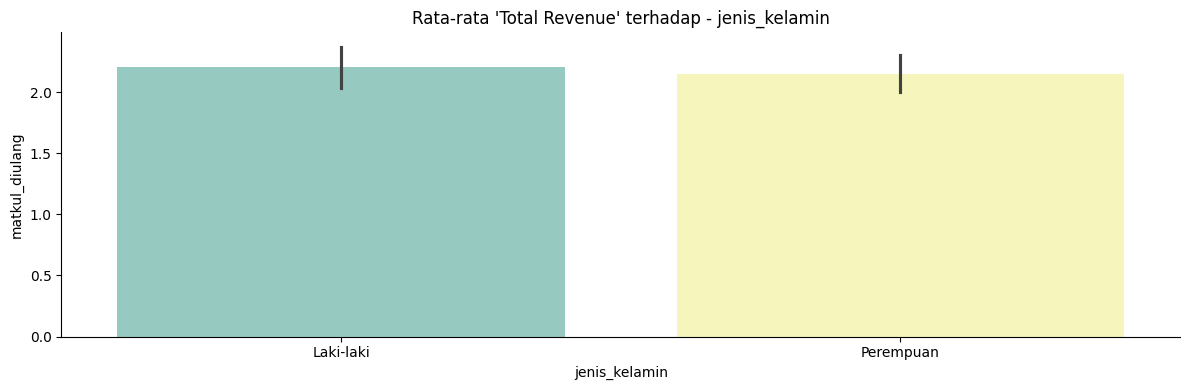

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


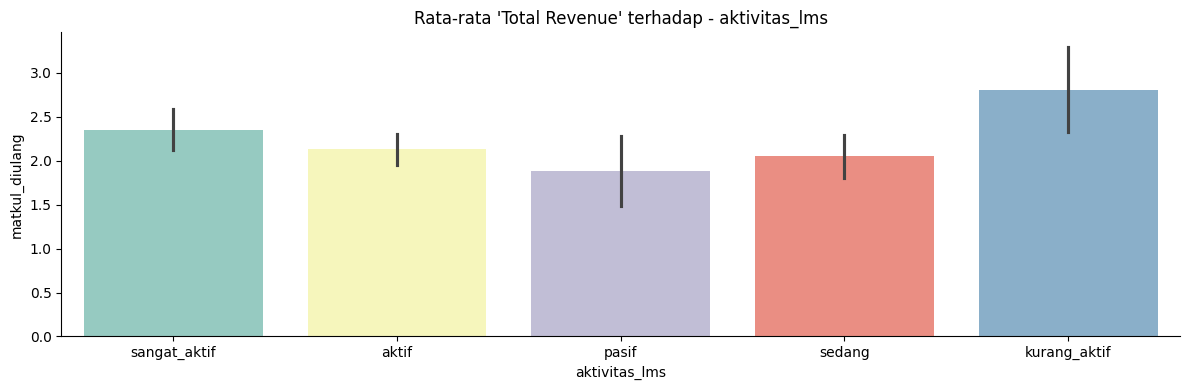

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


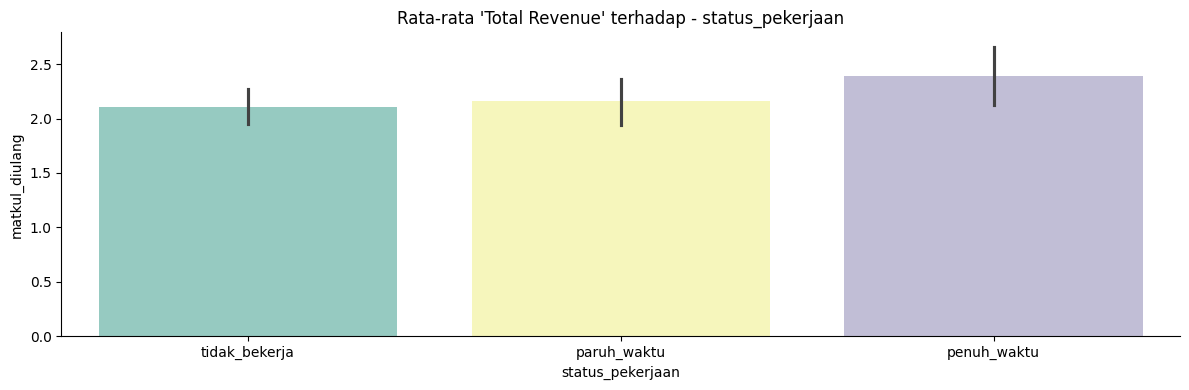

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


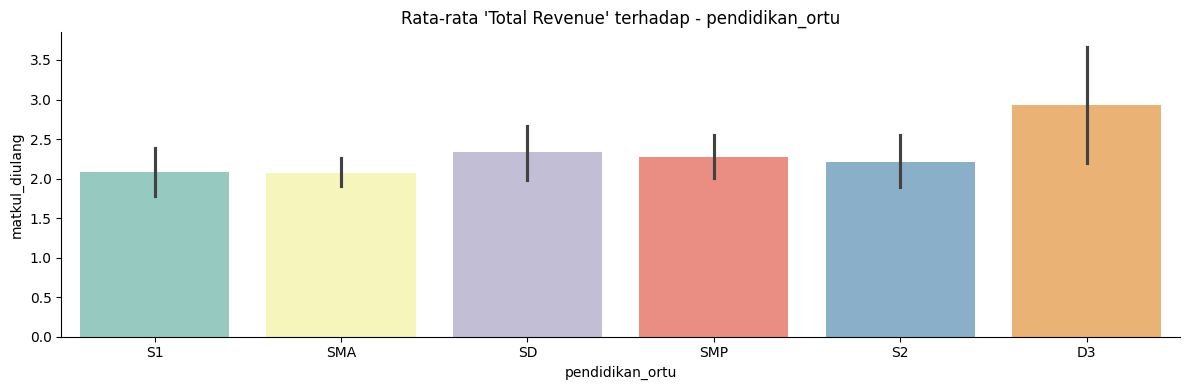

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


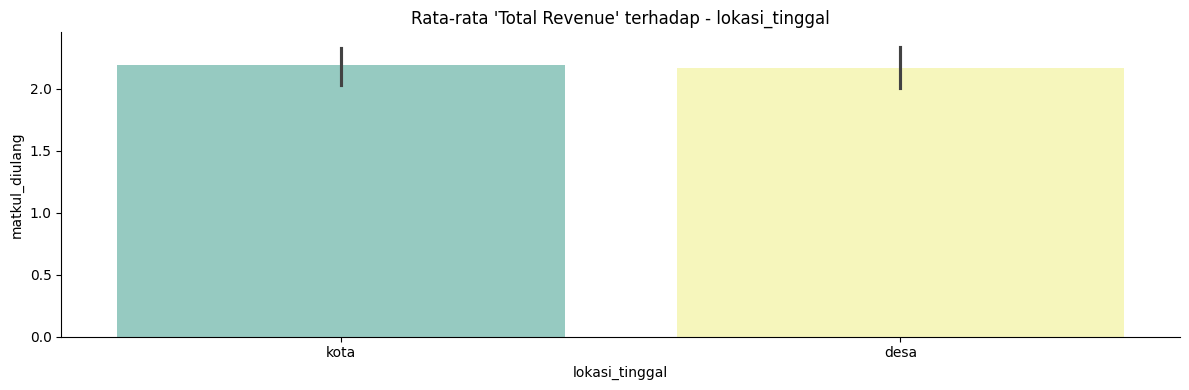

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


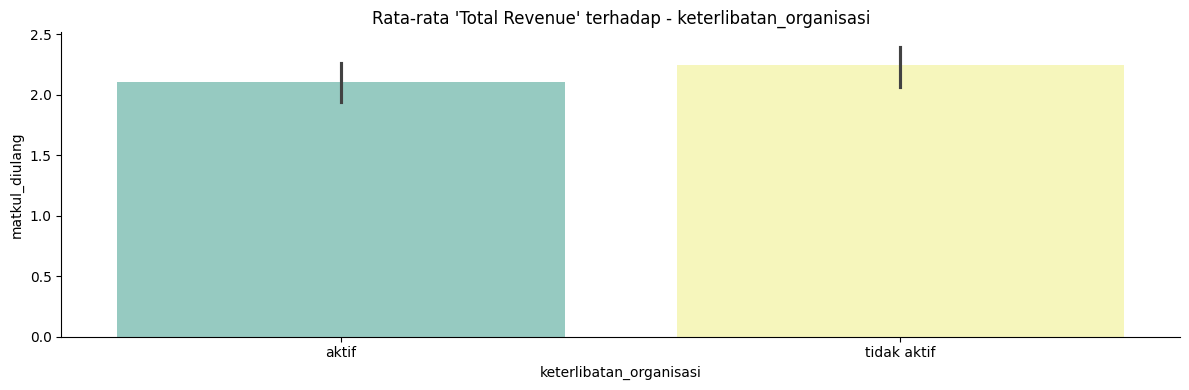

<ipython-input-18-fde8d15f4480>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


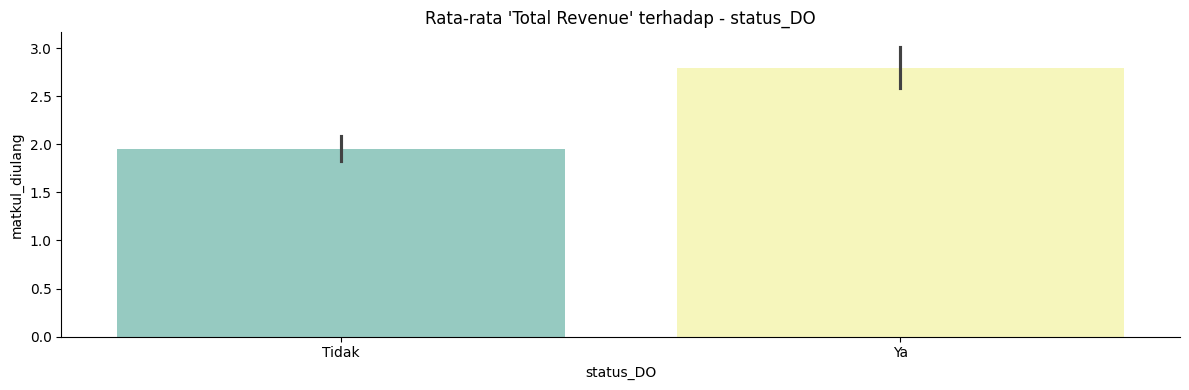

In [18]:
# Loop untuk setiap fitur kategorikal
for col in categorical_cols:
    sns.catplot(
        x=col,
        y="matkul_diulang",
        kind="bar",
        dodge=False,
        height=4,
        aspect=3,
        data=data,
        palette="Set3"
    )
    plt.title(f"Rata-rata 'Total Revenue' terhadap - {col}")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


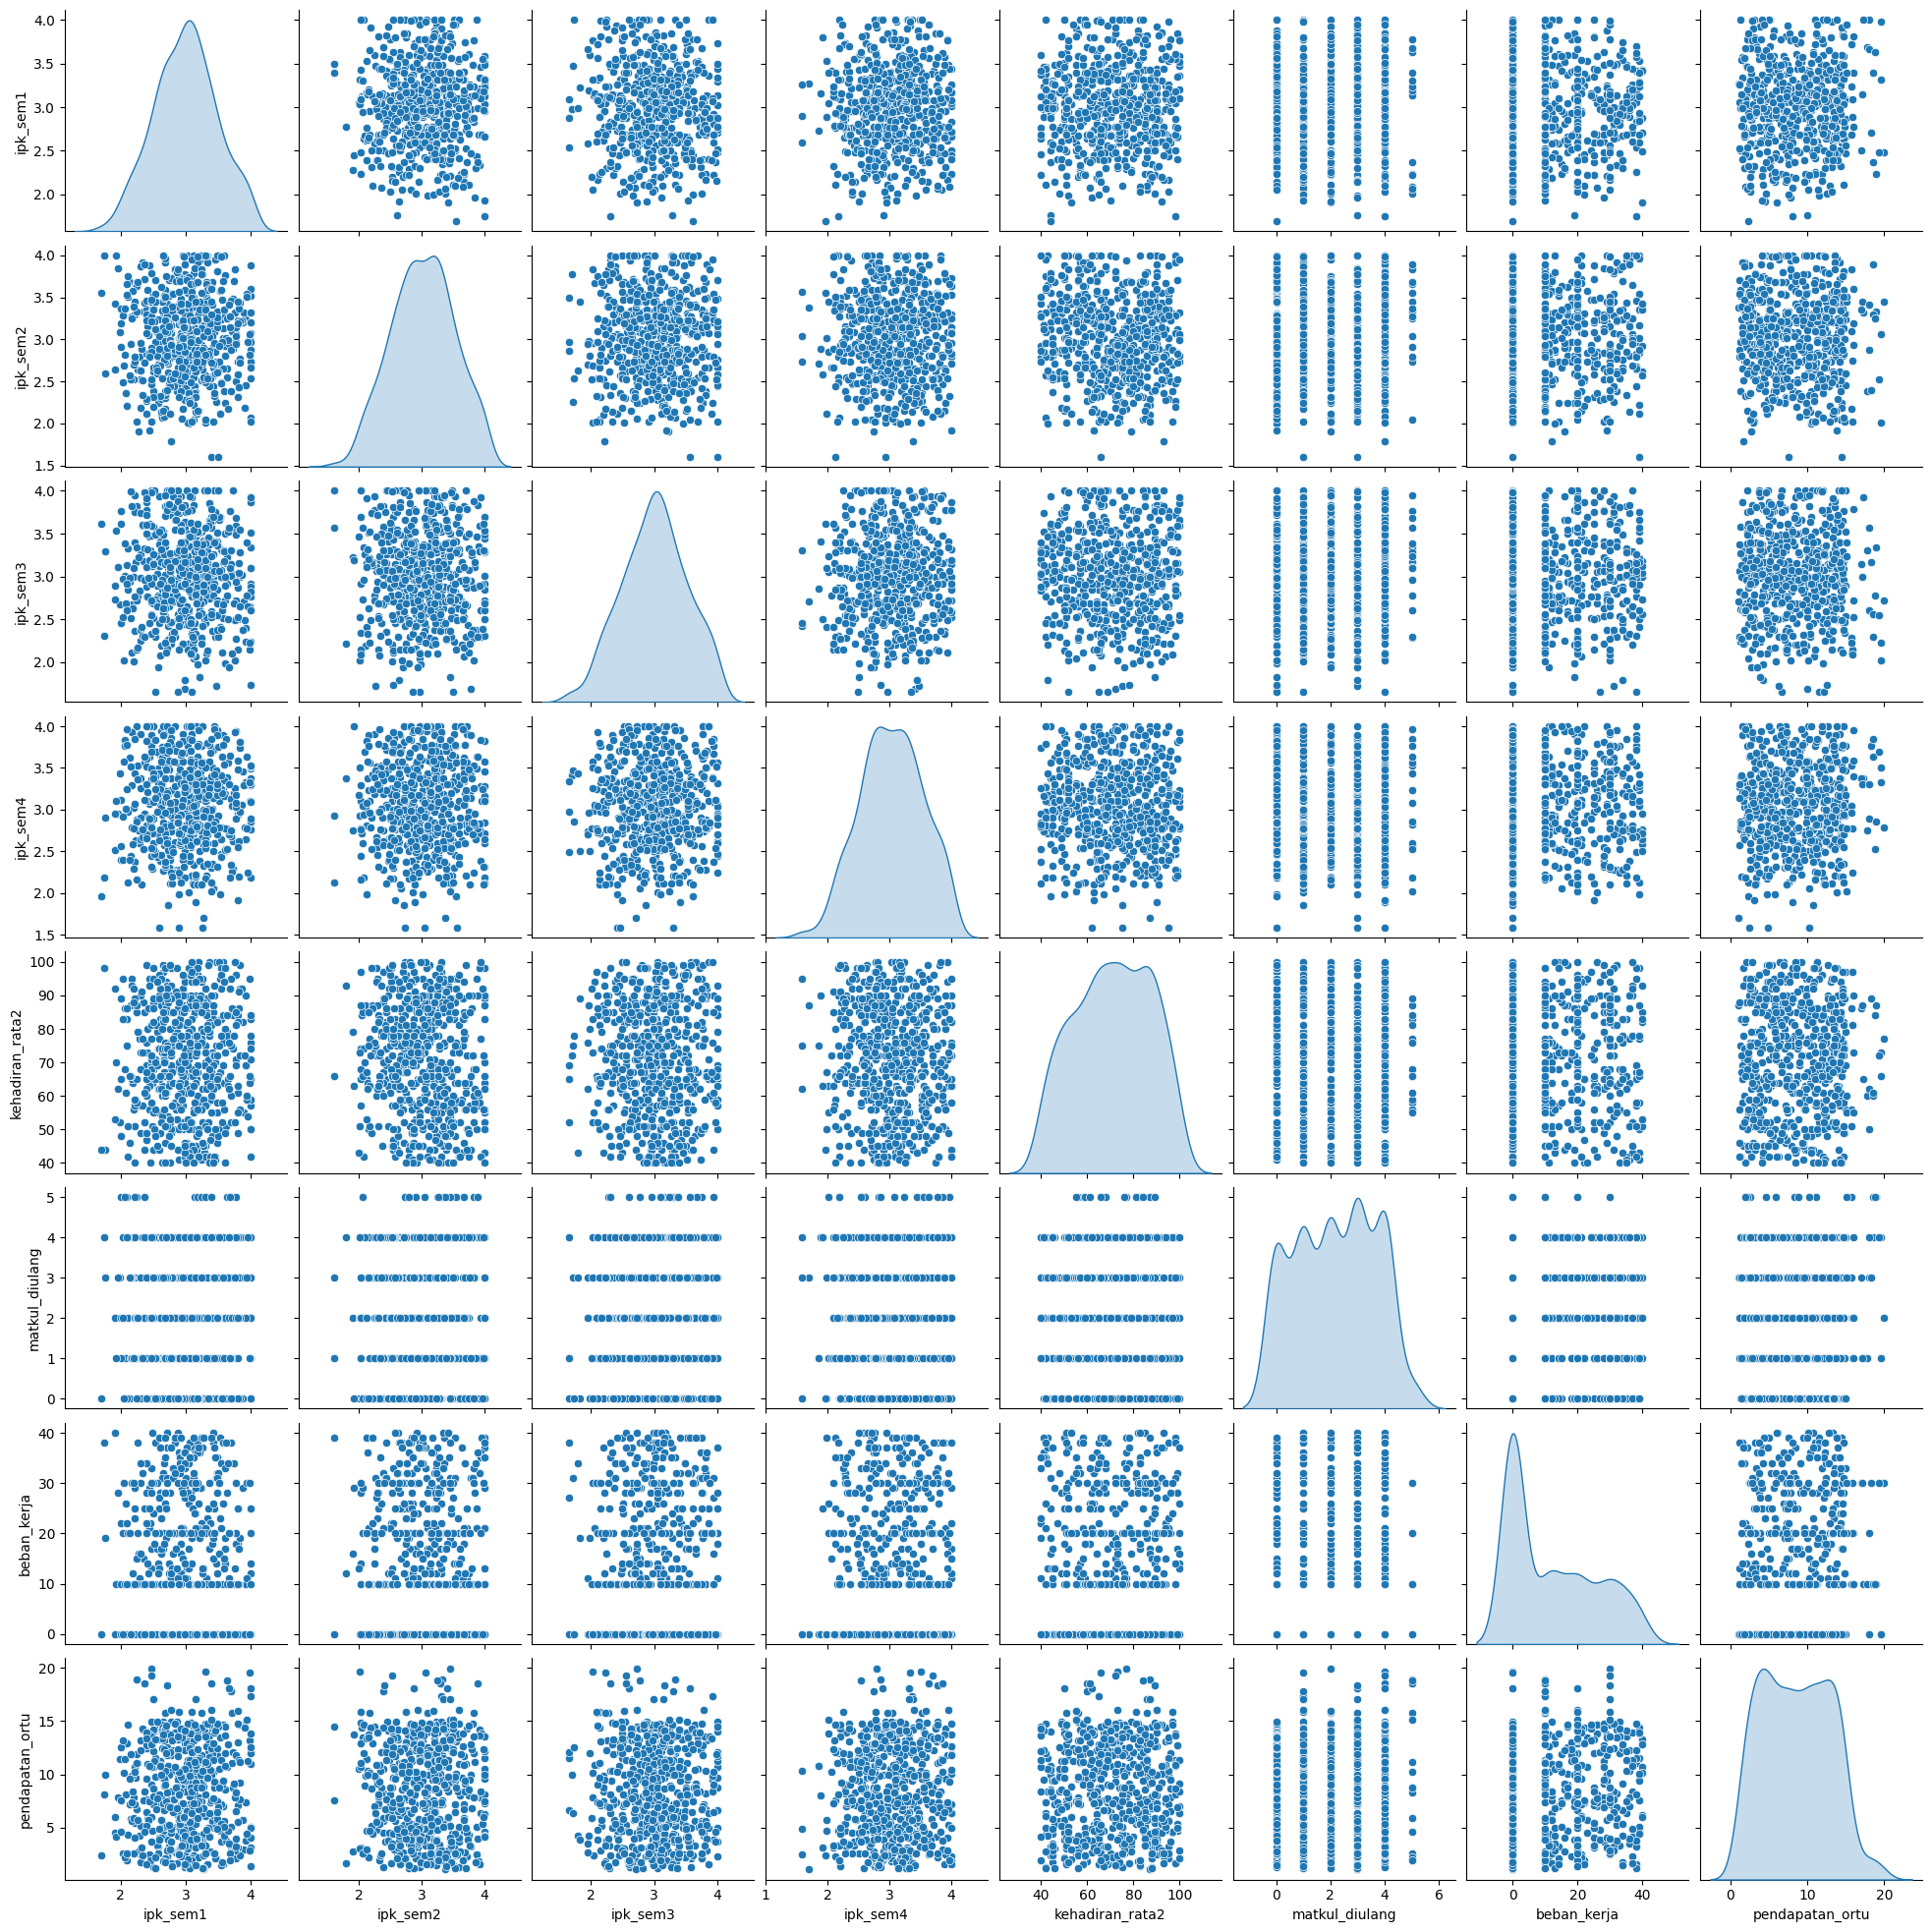

In [19]:
sns.pairplot(data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

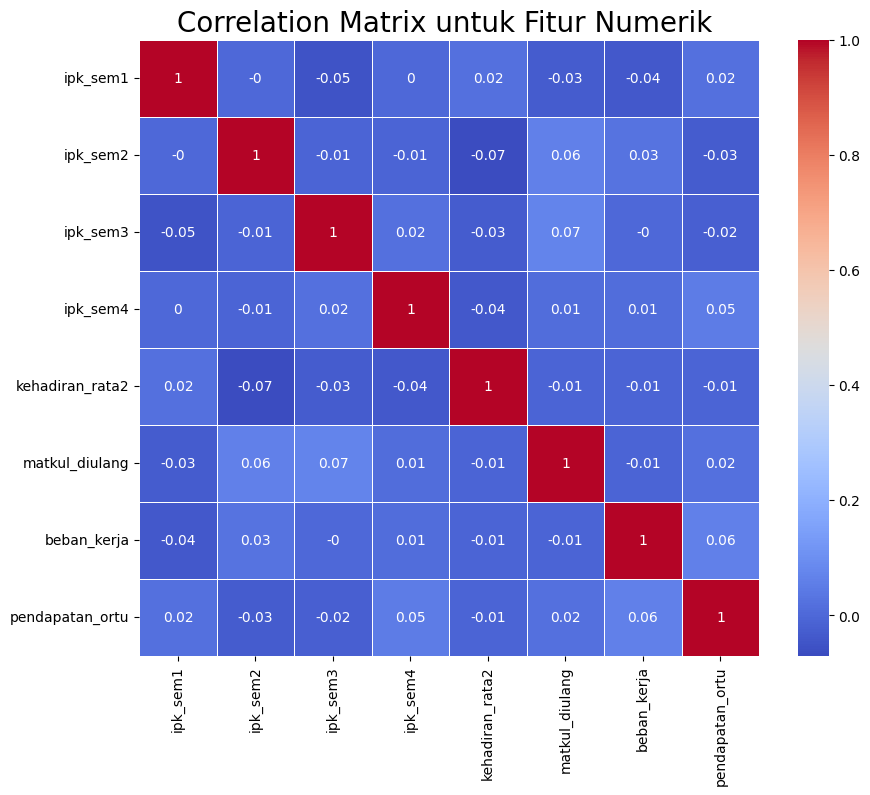

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# **5. Data Preparation**

In [21]:
# Salin data
data_encoded = data.copy()

# Kolom yang ingin di-label encode
label_encode_cols = ['prodi', 'status_DO']

# Kolom kategorikal (selain yang di-label encode)
categorical_cols = data.select_dtypes(include='object').columns.tolist()
onehot_encode_cols = [col for col in categorical_cols if col not in label_encode_cols]

# Label encoding
encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    encoders[col] = le

# One-hot encoding
data_encoded = pd.get_dummies(data_encoded, columns=onehot_encode_cols)

# Lihat hasil
print(data_encoded.head())


   ipk_sem1  ipk_sem2  ipk_sem3  ipk_sem4  kehadiran_rata2  matkul_diulang  \
0      3.25      2.93      3.32      3.76               80               0   
1      2.88      2.88      3.79      3.38               77               3   
2      2.77      3.27      2.77      2.77               85               4   
3      3.12      2.04      2.14      2.72               84               3   
4      2.49      3.16      2.55      2.29               64               0   

   prodi  beban_kerja  pendapatan_ortu  status_DO  ...  pendidikan_ortu_D3  \
0      2            0             4.12          0  ...               False   
1      7            0             4.26          0  ...               False   
2      1            0             4.89          0  ...               False   
3      7            0            14.40          1  ...               False   
4      6            0             4.70          0  ...               False   

   pendidikan_ortu_S1  pendidikan_ortu_S2  pendidikan_ortu_SD 

In [22]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ipk_sem1                             600 non-null    float64
 1   ipk_sem2                             600 non-null    float64
 2   ipk_sem3                             600 non-null    float64
 3   ipk_sem4                             600 non-null    float64
 4   kehadiran_rata2                      600 non-null    int64  
 5   matkul_diulang                       600 non-null    int64  
 6   prodi                                600 non-null    int64  
 7   beban_kerja                          600 non-null    int64  
 8   pendapatan_ortu                      600 non-null    float64
 9   status_DO                            600 non-null    int64  
 10  jenis_kelamin_Laki-laki              600 non-null    bool   
 11  jenis_kelamin_Perempuan         

In [23]:
data_encoded['status_DO'].value_counts()

,count
status_DO,
0,438
1,162


In [24]:
print(data_encoded.isnull().sum())

ipk_sem1                               0
ipk_sem2                               0
ipk_sem3                               0
ipk_sem4                               0
kehadiran_rata2                        0
matkul_diulang                         0
prodi                                  0
beban_kerja                            0
pendapatan_ortu                        0
status_DO                              0
jenis_kelamin_Laki-laki                0
jenis_kelamin_Perempuan                0
aktivitas_lms_aktif                    0
aktivitas_lms_kurang_aktif             0
aktivitas_lms_pasif                    0
aktivitas_lms_sangat_aktif             0
aktivitas_lms_sedang                   0
status_pekerjaan_paruh_waktu           0
status_pekerjaan_penuh_waktu           0
status_pekerjaan_tidak_bekerja         0
pendidikan_ortu_D3                     0
pendidikan_ortu_S1                     0
pendidikan_ortu_S2                     0
pendidikan_ortu_SD                     0
pendidikan_ortu_

In [25]:
print("Jumlah duplikasi: ", data_encoded.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
data_encoded

,ipk_sem1,ipk_sem2,ipk_sem3,ipk_sem4,kehadiran_rata2,matkul_diulang,prodi,beban_kerja,pendapatan_ortu,status_DO,...,pendidikan_ortu_D3,pendidikan_ortu_S1,pendidikan_ortu_S2,pendidikan_ortu_SD,pendidikan_ortu_SMA,pendidikan_ortu_SMP,lokasi_tinggal_desa,lokasi_tinggal_kota,keterlibatan_organisasi_aktif,keterlibatan_organisasi_tidak aktif
0,3.25,2.93,3.32,3.76,80,0,2,0,4.12,0,...,False,True,False,False,False,False,False,True,True,False
1,2.88,2.88,3.79,3.38,77,3,7,0,4.26,0,...,False,False,False,False,True,False,False,True,True,False
2,2.77,3.27,2.77,2.77,85,4,1,0,4.89,0,...,False,True,False,False,False,False,False,True,False,True
3,3.12,2.04,2.14,2.72,84,3,7,0,14.40,1,...,False,False,False,False,True,False,False,True,False,True
4,2.49,3.16,2.55,2.29,64,0,6,0,4.70,0,...,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3.44,2.36,3.40,3.42,93,3,1,20,2.58,1,...,False,False,False,False,False,True,False,True,True,False
596,3.63,3.25,2.78,2.53,84,5,6,10,18.87,1,...,False,False,False,False,True,False,False,True,False,True
597,2.14,2.57,2.98,2.40,66,3,7,20,9.63,0,...,False,False,True,False,False,False,True,False,False,True
598,3.68,3.27,3.10,2.19,66,5,1,10,1.93,0,...,False,False,False,False,False,True,True,False,True,False


In [27]:
X = data_encoded.drop('status_DO', axis=1)
y = data_encoded['status_DO']

In [28]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
import pandas as pd

# Misal X_resampled adalah DataFrame atau bisa dibuat jadi DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  # kalau X sebelumnya DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['status_DO'])  # ganti 'target' dengan nama kolom labelmu

# Gabungkan X dan y
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Tampilkan 5 data teratas
print(df_resampled.head())

# Atau lihat ukuran sebelum dan sesudah SMOTE
print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


   ipk_sem1  ipk_sem2  ipk_sem3  ipk_sem4  kehadiran_rata2  matkul_diulang  \
0      3.25      2.93      3.32      3.76               80               0   
1      2.88      2.88      3.79      3.38               77               3   
2      2.77      3.27      2.77      2.77               85               4   
3      3.12      2.04      2.14      2.72               84               3   
4      2.49      3.16      2.55      2.29               64               0   

   prodi  beban_kerja  pendapatan_ortu  jenis_kelamin_Laki-laki  ...  \
0      2            0             4.12                     True  ...   
1      7            0             4.26                    False  ...   
2      1            0             4.89                     True  ...   
3      7            0            14.40                    False  ...   
4      6            0             4.70                     True  ...   

   pendidikan_ortu_S1  pendidikan_ortu_S2  pendidikan_ortu_SD  \
0                True            

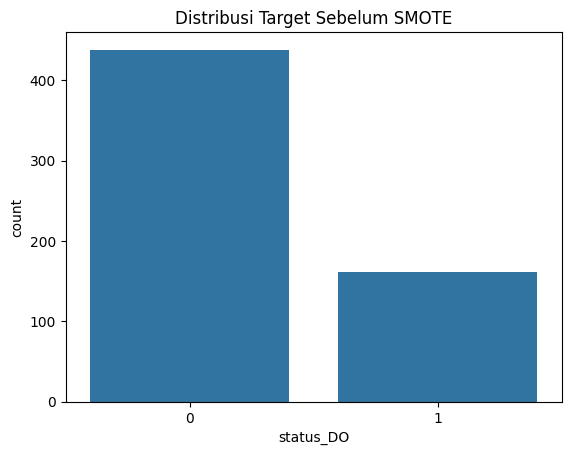

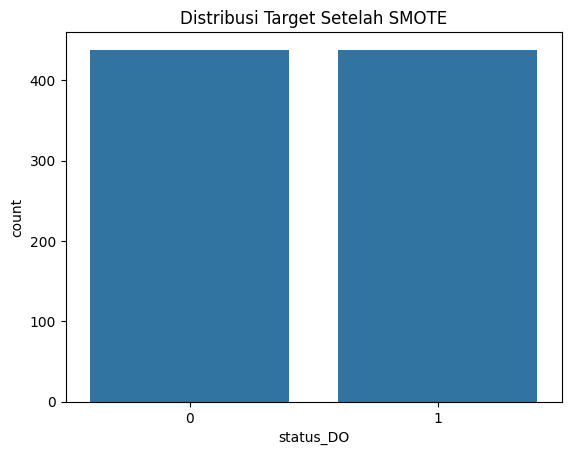

In [30]:
sns.countplot(x=y)
plt.title("Distribusi Target Sebelum SMOTE")
plt.show()

sns.countplot(x=y_resampled)
plt.title("Distribusi Target Setelah SMOTE")
plt.show()


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [32]:
# 6. Normalisasi hanya untuk fitur numerik (fit di train, transform di train & test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **6. Pembangunan Model Klasifikasi**

## **a. Pembangunan Model**

In [33]:
# 1. Inisiasi model
svm = SVC(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# 2. Training
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## **b. Visualisasi**

In [34]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Mapping label numerik ke nama kelas
    label_mapping = {
        0: "Tidak",
        1: "Ya",
    }

    # Dapatkan urutan label unik di y_test
    labels = sorted(np.unique(y_test))
    class_names = [label_mapping[label] for label in labels]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Confusion Matrix sebagai DataFrame
    cm_df = pd.DataFrame(cm, index=[f"Actual_{name}" for name in class_names],
                             columns=[f"Predicted_{name}" for name in class_names])

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Model: {model.__class__.__name__}")
    print("\nConfusion Matrix (Tabel):")
    display(cm_df)

    print("\nAkurasi: {:.4f}".format(acc))
    print("Precision (weighted): {:.4f}".format(precision))
    print("Recall (weighted): {:.4f}".format(recall))
    print("F1 Score (weighted): {:.4f}".format(f1))

    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
    print("-" * 50)

    # Visualisasi confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(xticks_rotation=0, cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()


Model: SVC

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,82,6
Actual_Ya,16,72



Akurasi: 0.8750
Precision (weighted): 0.8799
Recall (weighted): 0.8750
F1 Score (weighted): 0.8746

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.84      0.93      0.88        88
          Ya       0.92      0.82      0.87        88

    accuracy                           0.88       176
   macro avg       0.88      0.88      0.87       176
weighted avg       0.88      0.88      0.87       176

--------------------------------------------------


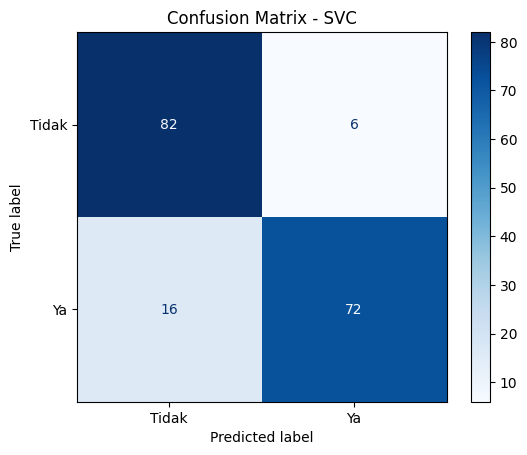

In [35]:
evaluate_model(svm, X_test, y_test)


Model: DecisionTreeClassifier

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,73,15
Actual_Ya,18,70



Akurasi: 0.8125
Precision (weighted): 0.8129
Recall (weighted): 0.8125
F1 Score (weighted): 0.8124

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.80      0.83      0.82        88
          Ya       0.82      0.80      0.81        88

    accuracy                           0.81       176
   macro avg       0.81      0.81      0.81       176
weighted avg       0.81      0.81      0.81       176

--------------------------------------------------


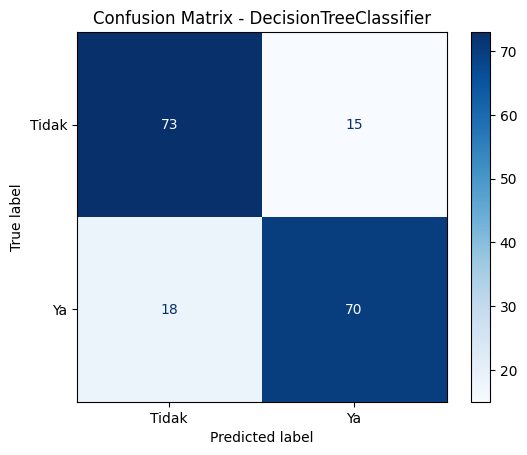

In [36]:
evaluate_model(dt, X_test, y_test)


Model: RandomForestClassifier

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,79,9
Actual_Ya,8,80



Akurasi: 0.9034
Precision (weighted): 0.9035
Recall (weighted): 0.9034
F1 Score (weighted): 0.9034

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.91      0.90      0.90        88
          Ya       0.90      0.91      0.90        88

    accuracy                           0.90       176
   macro avg       0.90      0.90      0.90       176
weighted avg       0.90      0.90      0.90       176

--------------------------------------------------


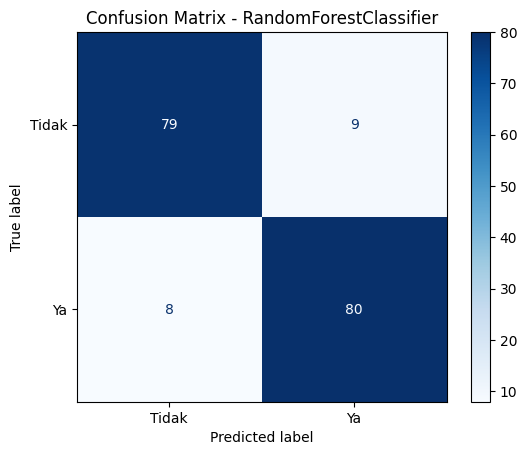

In [37]:
evaluate_model(rf, X_test, y_test)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

Model: LogisticRegression

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,80,8
Actual_Ya,18,70



Akurasi: 0.8523
Precision (weighted): 0.8569
Recall (weighted): 0.8523
F1 Score (weighted): 0.8518

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.82      0.91      0.86        88
          Ya       0.90      0.80      0.84        88

    accuracy                           0.85       176
   macro avg       0.86      0.85      0.85       176
weighted avg       0.86      0.85      0.85       176

--------------------------------------------------


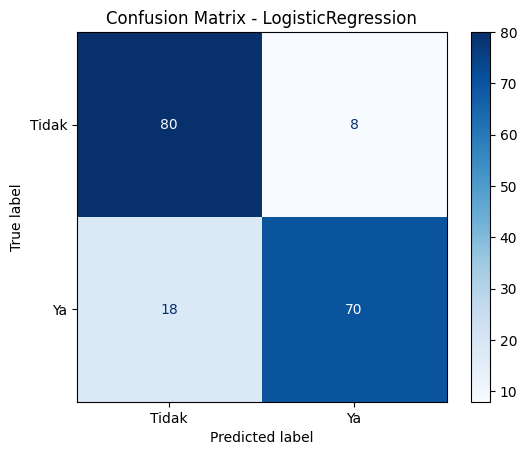

In [39]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test)


Model: GradientBoostingClassifier

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,77,11
Actual_Ya,9,79



Akurasi: 0.8864
Precision (weighted): 0.8866
Recall (weighted): 0.8864
F1 Score (weighted): 0.8863

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.90      0.88      0.89        88
          Ya       0.88      0.90      0.89        88

    accuracy                           0.89       176
   macro avg       0.89      0.89      0.89       176
weighted avg       0.89      0.89      0.89       176

--------------------------------------------------


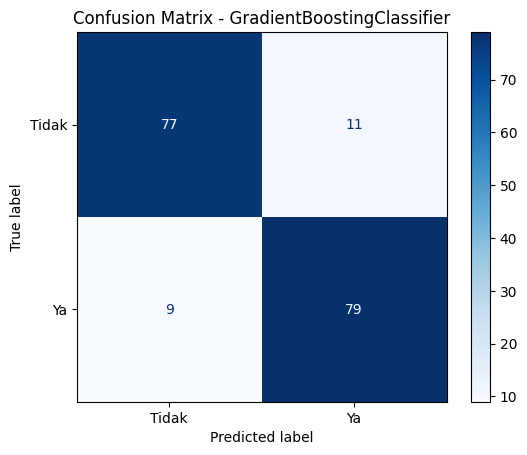

In [40]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)  # Tanpa scaling!
evaluate_model(gb_model, X_test, y_test)


Model: MLPClassifier

Confusion Matrix (Tabel):


,Predicted_Tidak,Predicted_Ya
Actual_Tidak,79,9
Actual_Ya,13,75



Akurasi: 0.8750
Precision (weighted): 0.8758
Recall (weighted): 0.8750
F1 Score (weighted): 0.8749

Classification Report:
               precision    recall  f1-score   support

       Tidak       0.86      0.90      0.88        88
          Ya       0.89      0.85      0.87        88

    accuracy                           0.88       176
   macro avg       0.88      0.88      0.87       176
weighted avg       0.88      0.88      0.87       176

--------------------------------------------------


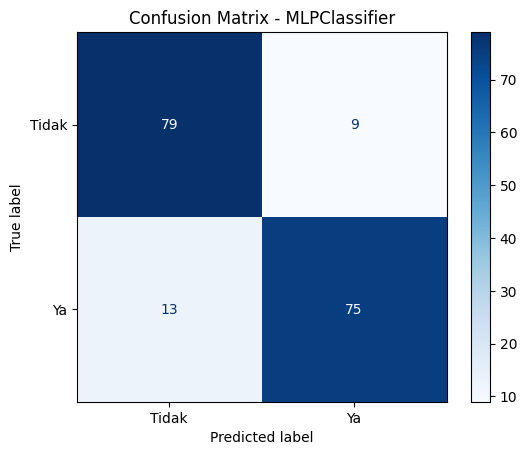

In [41]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', random_state=42)
mlp_model.fit(X_train, y_train)
evaluate_model(mlp_model, X_test, y_test)


In [42]:
# 1. Import Library
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [43]:
# Membangun dan melatih model ANN
ann_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),   # dua layer tersembunyi
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

ann_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

Akurasi : 0.875
Precision: 0.875776397515528
Recall   : 0.875
F1 Score : 0.8749354005167959

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        88
           1       0.89      0.85      0.87        88

    accuracy                           0.88       176
   macro avg       0.88      0.88      0.87       176
weighted avg       0.88      0.88      0.87       176



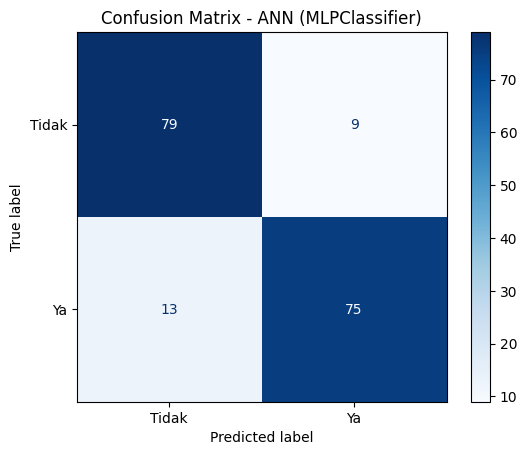

In [44]:
# Prediksi dan evaluasi
y_pred = ann_model.predict(X_test)

print("Akurasi :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak", "Ya"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - ANN (MLPClassifier)")
plt.show()


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [45]:
import joblib

# Simpan encoder dan nama kolom
joblib.dump(encoders, 'label_encoders.pkl')
joblib.dump(data_encoded.columns.tolist(), 'feature_columns.pkl')


['feature_columns.pkl']

In [46]:
from joblib import dump

dump(rf, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [48]:
import joblib

# Load the features variable from the saved file
features = joblib.load('feature_columns.pkl')

print("Fitur saat pelatihan (features):", features)
print("Jumlah fitur saat pelatihan:", len(features))

# The variable 'df' is available from previous steps
print("Fitur input user (df.columns):", df.columns.tolist())
print("Jumlah fitur input user:", len(df.columns))

Fitur saat pelatihan (features): ['ipk_sem1', 'ipk_sem2', 'ipk_sem3', 'ipk_sem4', 'kehadiran_rata2', 'matkul_diulang', 'prodi', 'beban_kerja', 'pendapatan_ortu', 'status_DO', 'jenis_kelamin_Laki-laki', 'jenis_kelamin_Perempuan', 'aktivitas_lms_aktif', 'aktivitas_lms_kurang_aktif', 'aktivitas_lms_pasif', 'aktivitas_lms_sangat_aktif', 'aktivitas_lms_sedang', 'status_pekerjaan_paruh_waktu', 'status_pekerjaan_penuh_waktu', 'status_pekerjaan_tidak_bekerja', 'pendidikan_ortu_D3', 'pendidikan_ortu_S1', 'pendidikan_ortu_S2', 'pendidikan_ortu_SD', 'pendidikan_ortu_SMA', 'pendidikan_ortu_SMP', 'lokasi_tinggal_desa', 'lokasi_tinggal_kota', 'keterlibatan_organisasi_aktif', 'keterlibatan_organisasi_tidak aktif']
Jumlah fitur saat pelatihan: 30
Fitur input user (df.columns): ['jumlah sampel', 'persentase']
Jumlah fitur input user: 2


In [49]:
features = joblib.load('feature_columns.pkl')

# Hilangkan kolom target jika ada
target_col = 'status_DO'
if target_col in features:
    features.remove(target_col)


In [50]:
# Tambahkan kolom hilang
for col in features:
    if col not in df.columns:
        df[col] = 0

# Hapus kolom ekstra
extra_cols = set(df.columns) - set(features)
if extra_cols:
    df = df.drop(columns=list(extra_cols))

# Urutkan kolom sesuai fitur pelatihan tanpa target
df = df[features]


In [56]:
import pandas as pd
import numpy as np
import joblib

# Load model Random Forest
model = joblib.load('random_forest_model.joblib')  # Model disimpan dari variabel `rf`

# Load encoder yang digunakan sebelumnya
encoders = joblib.load('label_encoders.pkl')

# Contoh input dari pengguna
user_input = {
    "ipk_sem1": 3.68,
    "ipk_sem2": 3.27,
    "ipk_sem3": 3.10,
    "ipk_sem4": 2.19,
    "kehadiran_rata2": 66,
    "matkul_diulang": 5,
    "prodi": "Hukum",
    "jenis_kelamin": "Perempuan",
    "aktivitas_lms": "kurang_aktif",
    "status_pekerjaan": "tidak_bekerja",
    "beban_kerja": 10,
    "pendapatan_ortu": 1.93,
    "pendidikan_ortu": "SMP",
    "lokasi_tinggal": "desa",
    "keterlibatan_organisasi": "aktif"
}

# Ubah ke DataFrame
df = pd.DataFrame([user_input])

# Label Encode 'prodi' if it's in user_input and was encoded during training
if 'prodi' in user_input and 'prodi' in encoders:
    df['prodi'] = encoders['prodi'].transform(df['prodi'])


# One-hot encoding for other categorical columns in user_input
categorical_cols_in_input = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols_in_input)


# Pastikan fitur sama seperti saat pelatihan
# Load feature columns excluding the target
features = joblib.load('feature_columns.pkl')
target_col = 'status_DO'
if target_col in features:
    features.remove(target_col)


# Tambahkan kolom yang hilang (one-hot encoded columns that weren't in user_input)
for col in features:
    if col not in df.columns:
        df[col] = 0
extra_cols = set(df.columns) - set(features)
if extra_cols:
    df = df.drop(columns=list(extra_cols))

# Urutkan kolom sesuai fitur pelatihan
df = df[features]

# Prediksi
prediction = model.predict(df)[0]
predicted_class_index = np.where(model.classes_ == prediction)[0][0]
prob = model.predict_proba(df)[0][predicted_class_index]


# Mapping hasil prediksi
label_mapping = {
    0: "Tidak Drop Out",
    1: "Drop Out"
}

print(f"Prediksi: {label_mapping[prediction]} (Probabilitas: {prob:.2f})")

Prediksi: Drop Out (Probabilitas: 0.75)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
loaded_encoders = joblib.load('label_encoders.pkl')
print("Keys in loaded_encoders:", loaded_encoders.keys())


Keys in loaded_encoders: dict_keys(['prodi', 'status_DO'])
